***

<b> <u> <center>
    Team 2 <br>
    Peace Ajah|  Edgar Zavala|  Shail Mehta|  Qinyi Wu|  Chein Chih Chang <br>
    A3: Unsupervised Analysis</u>
</b>

<center> Course : DAT-5303 | Machine Learning
<center>  Chase Kusterer - Faculty of Analytics </center>
<center>  Hult International Business School </center>
<center>  03/25/2020 </center> 
    
***

# INTRODUCTION 

<center><b> Apple Inc. and Microsoft Corporation.</b></center>

    Microsoft's corporate mission Statement:To empower every person and every organization on the planet to achieve more.

    Apple Inc. mission Statement:To bringing the best user experience to its customers through its innovative hardware, software, and services.

<center><b> Summary or the Case Study </b></center>

Apple Inc. and Microsoft Corporations are the two major players in the computer business. Consumers are always torn apart when it comes to making a decision on which new computer to buy. As a result, Apple (AAPL) and Microsoft (MSFT) have been rigorously researching several aspects of consumer buying behavior in regards to the decision making behind this question.

Apple Inc. and Microsoft Corporations have commissioned research and analysis teams to study aspects such as system architecture, security, and overall performance.

<center><b> Consultant Task by Microsoft Executives </b></center>

Microsoft Corporation hired our Consulting firm to research Consumer Decision Processes when deciding which new computer to buy. The analysis will be developed based on the perspective of the Big Five personality traits and the Hult DNA. 

External Research will be conducted during the analysis,Insights and Recommendation will be provided to Microsoft Corporation after completing the analysis. The analysis will help in letting Microsoft understand how their customers think when they are in the verge of buying a new laptop, they will also understand what underlying personality attribute and Demographics drive user Purchase Behavior

# Analysis Preparation

    The analysis preparation will be the section where needed python packages will be installed, data set will be imported, examined and investigate missing values.  

## Installing Packages 

     Installing all Packages needed for analyzing the Msft_df Dataset.This will help     ensure that run all our functions in our analysis. 

In [1]:
##### Import Packages and libraries ############
################################################

import sys                       # system-specific parameters and functions
import pandas            as pd   # data science essentials
import random            as rand # Getting Random Numbers
import seaborn           as sns  # enhanced visualization
import matplotlib.pyplot as plt  # fundamental data visualization
import numpy             as np
from sklearn.cluster         import KMeans
from sklearn.manifold        import TSNE  
from sklearn.decomposition   import PCA                    # pca
from sklearn.datasets        import load_digits            # digits dataset 
from sklearn.preprocessing   import StandardScaler         # standard scaler
from scipy.cluster.hierarchy import dendrogram, linkage    # dendrograms

import time
start_time = time.time()     # For calculating how long the code is running for.


## Importing and Loading Dataset
        
    The Dataset provided to the consultants will be loaded as Msft_df. 

In [2]:
#########################################
##### setting pandas print options ######
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

file = 'Survey_Data_Final_Exam.xlsx'
Msft_df = pd.read_excel(file)
#print (AaplMsft_df.columns)

# pulling up data dictionary
Msft_df_description = pd.read_excel('Survey_Data_Final_Exam.xlsx')

#######    setting random seed   ########
#########################################
rand.seed(a = 802)


## Getting the concise summary of the dataframe with .info, 

    .info will help in completing the exploratory analyis of the data frame. It gives information on the types and numbers of each variables, including non_missing values 
    
    .describe gives data frame  basic statistical details like percentile, mean,         standard deviation etc.
    
    iloc returns a Pandas Series when one row is selected, and a Pandas DataFrame when multiple rows are selected, or if any column in full is selected.

In [3]:
#######    Checking the DataFrame Info   ########
#################################################
Msft_df.info()

#######    Checking the DataFrame Describe  ########
####################################################
Msft_df.describe().round(2)
Msft_df.iloc[ : , 1: ] .describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 79 columns):
surveyID                                                                        392 non-null object
Am the life of the party                                                        392 non-null int64
Feel little concern for others                                                  392 non-null int64
Am always prepared                                                              392 non-null int64
Get stressed out easily                                                         392 non-null int64
Have a rich vocabulary                                                          392 non-null int64
Don't talk a lot                                                                392 non-null int64
Am interested in people                                                         392 non-null int64
Leave my belongings around                                                      392 non-null int64
Am 

,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What is your age?
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,2.94,2.76,3.57,2.91,3.31,2.90,3.83,2.43,3.30,2.41,3.65,1.73,4.09,3.59,3.98,3.11,4.11,2.32,2.89,2.13,3.38,2.45,3.29,2.76,3.86,2.60,3.77,2.32,2.49,2.11,2.91,2.27,3.82,2.77,3.91,3.22,3.67,2.32,2.50,2.70,3.01,3.94,3.69,2.58,3.92,3.43,3.88,3.77,2.48,3.79,3.92,2.36,4.00,4.14,3.95,3.85,4.03,4.02,3.89,4.01,4.04,2.81,4.12,4.26,3.94,2.51,3.91,3.94,4.06,3.76,4.28,27.34
std,1.12,1.31,0.89,1.23,0.95,1.14,0.99,1.36,1.09,1.10,1.00,0.96,0.83,1.13,0.93,1.01,0.86,1.08,1.04,1.02,1.01,1.07,1.03,1.12,0.75,1.05,1.06,1.19,1.16,1.09,1.13,1.02,1.00,1.13,0.91,1.16,0.93,1.02,1.21,1.05,1.20,0.97,1.03,1.15,0.95,1.10,0.79,0.88,1.07,0.88,0.82,1.05,0.78,0.77,0.81,0.91,0.81,0.72,0.88,0.79,0.81,1.03,0.76,0.68,0.77,1.10,0.79,0.73,0.80,0.88,0.75,5.34
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,1.00,2.00,2.00,2.00,1.00,1.00,15.00
25%,2.00,2.00,3.00,2.00,3.00,2.00,3.00,1.00,2.00,2.00,3.00,1.00,4.00,3.00,3.00,2.00,4.00,1.00,2.00,1.00,3.00,2.00,3.00,2.00,3.00

## Checking for Missing Values 

    It’s important to understand the sources of missing data before diving into the       code. There are some reasons why there will be missing values in a data, some of       those reasons are: user forgot to fill the field or choose not fill the field. 
    
    It’s important to understand these different types of missing data from a statistics point of view. The type of missing data will influence how to deal with cleaning the data.


In [4]:
# looping over columns with missing values
for col in Msft_df:

    # creating columns with 1s if missing and 0 if not
    if Msft_df[col].isnull().astype(int).sum() > 0:             
        Msft_df['m_'+col] = Msft_df[col].isnull().astype(int)   

# displaying the first five rows of the DataFrame
#AaplMsft_df.head(n=5)

# making sure all missing values have been taken care of
Msft_df.isnull().any()
Msft_df.isnull().any().sum()

1

## Analysis Preparation Conclusion 

   In the analysis preparation, all packages were installed and data loaded. In the info section, we were able to find out how many rows and columns in the data.  The data has 392 rows and 79 columns. 
   
   There was only one missing field which was in the ethnicity column which had 391 rows and 79 columns, the consultants considered it not significant because it will not skew the result or affect the analysis. Hence decided not to clean the data. 

# Exploratory Analysis

    Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. EDA will allow us to uncover patterns and insights  within data. It summarizes the main characteristics in the dataframe.  

# Principal Component Analysis (PCA)

    Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional datasets into a dataset with fewer variables, where the set of resulting variables explains the maximum variance within the dataset. PCA is used prior to unsupervised and supervised machine learning steps to reduce the number of features used in the analysis, thereby reducing the likelihood of error.

## K Means Clustering

K Means Clustering is an unsupervised machine, it tries to cluster your data into clusters based on their similarity. User defined functions was built in the section to plot the inertia. Functions that analyst define in a python script to do certain specific task are referred as user-defined functions. 


In [5]:
#######    Interia Plot def function  ##############
####################################################

def interia_plot(data, max_clust = 10):
    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # appending each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting 
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()



## Scree plot

    In order gain a more comprehensive view of how each principal component explains the variance within the data, we will construct a scree plot. A scree plot displays the variance explained by each principal component within the analysis

In [6]:
#######    Scree Plot def function  ##############
####################################################

def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_survey_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


# Feature Treatment and Engineering 

        In this section,the data frame will be divided into 3 different parts, which will help in analyzing the Principal Component Analysis (PCA). Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components

## Dropping Dataset

    While analyzing the data, we realized that Dataset provided had 3 questions that was asked twice. This gives us the opportunity to understand which students filled the survey correctly and which onces were not paying attention. 
    
    The Consultants theory is that if students answer the exact same questions differently, then they are simply not paying attention and as a result we will delete all rows with differed answers because they are not relevant since the answers are false, all they will do is skew the data. We are given a benefit of doubt for students who have 1 point discrepancy, hence we will drop the row if the answer differs by 2 or more.  

In [7]:
#####  Dropping the 3 Repeated Questions ###########################
######################################################################

##### Creating columns for the 3 questions that were repeated in the dataset #####
Msft_df["New"]=Msft_df['Respond effectively to multiple priorities']\
-Msft_df['Respond effectively to multiple priorities.1']
Msft_df["New1"]=Msft_df['Take initiative even when circumstances, objectives, or rules aren\'t clear']\
-Msft_df['Take initiative even when circumstances, objectives, or rules aren\'t clear.1']
Msft_df['New2']=Msft_df['Encourage direct and open discussions']\
-Msft_df['Encourage direct and open discussions.1']
 
Msft_df["New"]=Msft_df["New"].abs()
Msft_df["New1"]=Msft_df["New1"].abs()
Msft_df['New2']=Msft_df["New2"].abs()
 
##### Here we are droping the survey rows that are not valid, meaning a difference #####
##### of 2 or more #############################################
Msft_df = Msft_df.drop(Msft_df[Msft_df.New >= 2].index)
Msft_df = Msft_df.drop(Msft_df[Msft_df.New1 >= 2].index)
Msft_df = Msft_df.drop(Msft_df[Msft_df.New2 >= 2].index)

##### The added "what is your ethnicity column that was added when the #####
##### Missing Value was checked.
Msft_df = Msft_df.drop(["m_What is your ethnicity?"],  axis =1)
##### checking number of rows to know which one was dropped ########
Msft_df

,surveyID,Am the life of the party,Feel little concern for others,Am always prepared,Get stressed out easily,Have a rich vocabulary,Don't talk a lot,Am interested in people,Leave my belongings around,Am relaxed most of the time,Have difficulty understanding abstract ideas,Feel comfortable around people,Insult people,Pay attention to details,Worry about things,Have a vivid imagination,Keep in the background,Sympathize with others' feelings,Make a mess of things,Seldom feel blue,Am not interested in abstract ideas,Start conversations,Am not interested in other people's problems,Get chores done right away,Am easily disturbed,Have excellent ideas,Have little to say,Have a soft heart,Often forget to put things back in their proper place,Get upset easily,Do not have a good imagination,Talk to a lot of different people at parties,Am not really interested in others,Like order,Change my mood a lot,Am quick to understand things,Don't like to draw attention to myself,Take time out for others,Shirk my duties,Have frequent mood swings,Use difficult words,Don't mind being the center of attention,Feel others' emotions,Follow a schedule,Get irritated easily,Spend time reflecting on things,Am quiet around strangers,Make people feel at ease,Am exacting in my work,Often feel blue,Am full of ideas,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?,New,New1,New2
0,a1000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,2,4,4,4,4,4,4,4,4,4,3,4,4,4,2,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,0,0,0
1,a1001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,2,4,4,4,5,5,5,5,5,2,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,1,1,0
2,a1002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,2,5,3,5,2,3,5,2,3,3,2,3,4,4,2,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,0,0,0
3,a1003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,1,1,0
4,a1004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,3,5,3,3,3,3,3,3,4,4,4,3,3,4,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,0,0,1
5,a1005,3,2,2,5,2,2,4,2,3,2,2,2,4,5,3,4,4,4,2,3,2,2,2,4,3,4,4,3,3,2,2,2,3,4,4,4,4,3,3,3,3,4,2,4,4,4,3,3,4,3,4,2,3,4,4,3,3,4,3,3,4,4,3,4,3,2,3,3,5,3,4,Macbook,Macbook,DD (MIB & Business Analytics),22,Male,Indian,West Asian / Indian,0,0,0
6,a1006,3,4,4,5,3,4,4,3,2,1,2,2,4,4,3,3,4,3,3,2,2,2,1,4,

## Reversing Contrary Questions 

Some of the questions are designed to measure the degree that each user exhibits traits. These questions were noticed to be the opposite of the personality traits being  studied. Reversing the questions and their answers will be advantageous in comparing to the rest of the questions. This being said, students who answered 5, their answers will be flipped to 1 and vice versa. 

Only the Hult DNA Questions were reversed because the personality trait calculations had already put it in consideration. 


In [8]:
#####################  Contrary Questions ###########################
######################################################################

##### Here we are reversing the answer for the Hult DNA Questions #####
##### that was reveresed ##############################################
inverse_dic = {5:1, 4:2, 3:3, 2:4, 1:5}

#turning scales
for col in [52,62,66]: #colums to be turned
    Msft_df.iloc[:,col].replace(inverse_dic, inplace = True)
    

# Big Five Personality Traits  

Psychological researchers often define personality in terms of five core traits,     which can be thought of as stable dispositions that drive behavior.Psycologist believe that every humans uniqueness originates from the combination of 5 personaility traits that we all share,  This five traits are:
    
            1. Openness
            2. Conscientiousness
            3. Extraversion
            4. Agreeableness
            5. Neuroticism
            
Openness - People who like to learn new things and enjoy new experiences usually score high in openness. Openness includes traits like being insightful and imaginative and having a wide variety of interests.

Conscientiousness - People that have a high degree of conscientiousness are reliable and prompt. Traits include being organized, methodic, and thorough.

Extraversion - Extraverts get their energy from interacting with others, while introverts get their energy from within themselves. Extraversion includes the traits of energetic, talkative, and assertive.

Agreeableness - These individuals are friendly, cooperative, and compassionate. People with low agreeableness may be more distant. Traits include being kind, affectionate, and sympathetic.

Neuroticism - Neuroticism is also sometimes called Emotional Stability. This dimension relates to one’s emotional stability and degree of negative emotions. People that score high on neuroticism often experience emotional instability and negative emotions. Traits include being moody and tense.

    

## Grouping the Big 5 Personality

    In this section, each of the first 50 question will be divided into the big 5  traits listed above. 
    
    Document used for separating the big five personality into a data frame:        https://openpsychometrics.org/printable/big-five-personality-test.pdf

In [9]:
######### separating the big five personality into a dataframe  ######
######################################################################

Msft_df_five = Msft_df.iloc[:,1:51]

##### Creating the columns in the dataframe #########################
Msft_df_five.columns = np.arange(1,51)

##### Creating the new columns with the calculation #######################

Msft_df_five['Openness'] =8 + Msft_df_five[5]-Msft_df_five[10]+\
                              Msft_df_five[15]-Msft_df_five[20]+\
                              Msft_df_five[25]-Msft_df_five[30]+\
                              Msft_df_five[35]+Msft_df_five[40]+\
                              Msft_df_five[45]+Msft_df_five[50]

Msft_df_five['Conscientiousness'] =14 + Msft_df_five[3]-Msft_df_five[8]+\
                                        Msft_df_five[13]-Msft_df_five[18]+\
                                        Msft_df_five[23]-Msft_df_five[28]+\
                                        Msft_df_five[33]-Msft_df_five[38]+\
                                        Msft_df_five[43]+Msft_df_five[48]

Msft_df_five['Extroversion'] = 20 + Msft_df_five[1]-Msft_df_five[6]+\
                                    Msft_df_five[11]-Msft_df_five[16]+\
                                    Msft_df_five[21]-Msft_df_five[26]+\
                                    Msft_df_five[31]-Msft_df_five[36]+\
                                    Msft_df_five[41]-Msft_df_five[46]

Msft_df_five['Agreeableness'] =14 - Msft_df_five[2]+Msft_df_five[7]-\
                                    Msft_df_five[12]+Msft_df_five[17]-\
                                    Msft_df_five[22]+Msft_df_five[27]-\
                                    Msft_df_five[32]+Msft_df_five[37]+\
                                    Msft_df_five[42]+Msft_df_five[47]

Msft_df_five['Neuroticism'] =38 - Msft_df_five[4]+Msft_df_five[9]-\
                                  Msft_df_five[14]+Msft_df_five[19]-\
                                  Msft_df_five[24]-Msft_df_five[29]-\
                                  Msft_df_five[34]-Msft_df_five[39]-\
                                  Msft_df_five[44]-Msft_df_five[49]

######### Creating new column name ######################
Msft_df_five = Msft_df_five[['Openness','Conscientiousness',
                             'Extroversion','Agreeableness',
                             'Neuroticism']]

##### checking the  Msft_df_Five DataFrame
Msft_df_five

,Openness,Conscientiousness,Extroversion,Agreeableness,Neuroticism
0,25,32,22,25,21
1,30,29,15,24,20
2,23,29,24,16,33
3,29,22,18,32,20
4,23,22,21,21,17
5,23,18,14,29,11
6,25,22,18,28,13
7,15,11,20,20,28
8,29,30,29,28,31
9,21,29,17,24,23


## Standard Scaler

    Scaling the data is very important before running the analysis. it helps in normalizing the data within a particular range, hence preventing features with high magnitudes to weigh in a lot more in the distance calculations than features with low magnitudes.

In [10]:
################### standardize the 5 Personality Trait  #########################
##############################################################################

scaler = StandardScaler()

##### fitting the 5 Personaility Trait dataframe ################
scaler.fit(Msft_df_five)

##### Transforming the data #######################################
Msft_df_five_scaled = scaler.transform(Msft_df_five)

##### Creating the data frame with the scaled data #################
Msft_df_five_scaled_df = pd.DataFrame(Msft_df_five_scaled)

##### renaming the columns for the new data set ########################
Msft_df_five_scaled_df.columns = Msft_df_five.columns

##### checking pre and post scaling variance ###############################
print(pd.np.var(Msft_df_five),'\n\n')
print(pd.np.var(Msft_df_five_scaled_df))

Openness             26.958738
Conscientiousness    30.411963
Extroversion         42.936639
Agreeableness        31.318641
Neuroticism          46.962427
dtype: float64 


Openness             1.0
Conscientiousness    1.0
Extroversion         1.0
Agreeableness        1.0
Neuroticism          1.0
dtype: float64


## Plotting the Standard Scaler (Scree Plot)

    Plotting the Scree plot is advantageous in examining the pattern of decreasing variability attributable to each of the 5 Personality trait component in order to enlighten the selection of how many such components should be considered relevant for interpretation

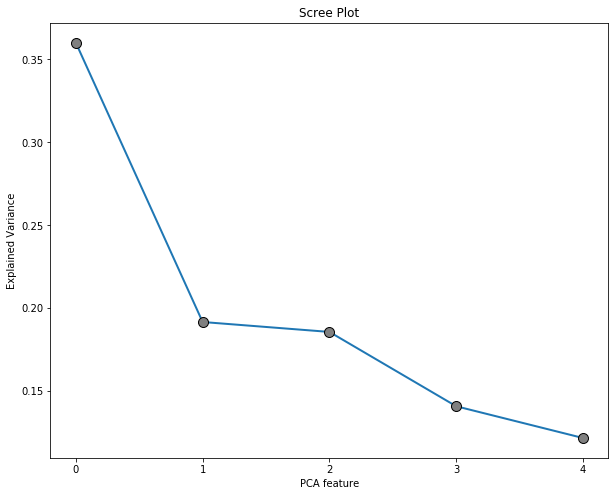

In [11]:
################### Instanting a PCA  ################################
######################################################################

##### Instanting a PCA with no limit to principal components #########
Big5_Msft = PCA (n_components= None, random_state=802)

##### fitting and transforming the PCA ###################################
Big5_Msft_ft = Big5_Msft.fit_transform(Msft_df_five_scaled_df)

##### calling the scree_plot ##############################################
scree_plot(pca_object = Big5_Msft)

<b> Analyzing the Above Scree Plot </b>

In Analyzing the Scree plot, there is a flat slope between 1 and 2, then it reduces in 3. Ideally, we are supposed
e to pick the point where the line goes flat, but it won't give a significant value to pick just choose 2 points (0 & 1), hence we decided to pick from 0 to 2 as the optimal values.

## 3 Component Standard Scaler Plot

In Analyzing the Scree plot, there is a flat slope between 1 and 2, then it reduces in 3. Ideally, we are supposed
e to pick the point where the line goes flat, but it won't give a significant value to pick just choose 2 points (0 & 1), hence we decided to pick from 0 to 2 as the optimal values.


    

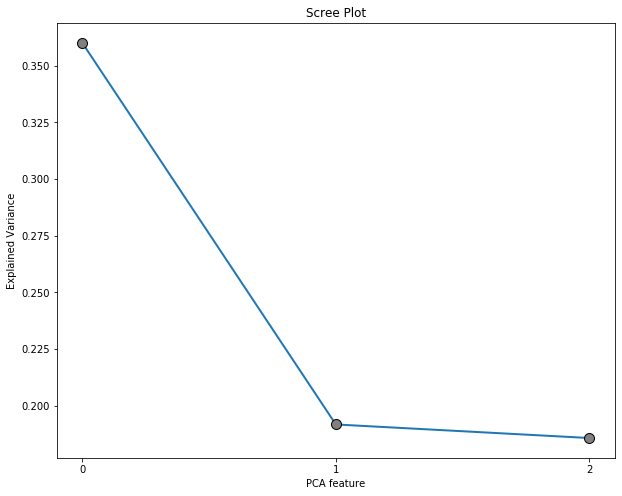

In [12]:
################### Instanting the  PCA New Model  ######################
######################################################################

##### Instantiating a new model using the 3 principal components ##########
Big5_Msft_3 = PCA(n_components = 3,
          random_state = 802)


##### fitting and transforming the scaled data ##############################
Big5_Msft_ft = Big5_Msft_3.fit_transform(Msft_df_five_scaled_df)

##### Plotting the scree plot with 3 components #############################
scree_plot(pca_object = Big5_Msft_3)

## 3 Comparing the PCA Standard Model to the PCA Model with 3 Components

    In this section, we are comparing the 2 PCA models, the original one and the modified PCA model with 3 components. 

In [13]:
################### Unlimited component PCA model  ######################
#########################################################################

##### transposing pca components (pc = MAX) ##########################
FL_Big5_Msft = pd.DataFrame(pd.np.transpose(Big5_Msft.components_))


##### naming rows as original features ##############################
FL_Big5_Msft = FL_Big5_Msft.set_index(Msft_df_five.columns)


##### 3 component PCA model ##########################################
######################################################################

##### transposing pca components (pc = 3) ############################
FL_Big5_Msft_3 = pd.DataFrame(pd.np.transpose(Big5_Msft_3.components_))


##### naming rows as original features ###############################
FL_Big5_Msft_3 = FL_Big5_Msft_3.set_index(Msft_df_five.columns)


##### checking the results ###########################################
print(f"""
MAX Components Factor Loadings
------------------------------
{FL_Big5_Msft.round(2)}


3 Components Factor Loadings
------------------------------
{FL_Big5_Msft_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                      0     1     2     3     4
Openness          -0.50  0.09  0.35 -0.74  0.26
Conscientiousness -0.49 -0.49  0.27  0.17 -0.65
Extroversion      -0.37  0.68 -0.46 -0.04 -0.43
Agreeableness     -0.52  0.20  0.20  0.64  0.49
Neuroticism       -0.32 -0.51 -0.74 -0.10  0.28


3 Components Factor Loadings
------------------------------
                      0     1     2
Openness          -0.50  0.09  0.35
Conscientiousness -0.49 -0.49  0.27
Extroversion      -0.37  0.68 -0.46
Agreeableness     -0.52  0.20  0.20
Neuroticism       -0.32 -0.51 -0.74



## Naming the PCA Models

The reasoning behind the names id from the 3 component factor loading model above. 

We named the first group "Obstinate" because we see them as people who are more traditional in thinking, they avoid change, not very structured, avoid large group, introvert, more reserved, self centered and more calm in stressful situations.

The 2nd group was named "Outgoing Person" because they are viewed to Make friends easily, Seek excitement or adventures, caring, interested in people around them, more optimistic

The 3rd group was named "Cognitive Person" because they are more optimistic, worry less, have stable mood, goal driven, persistent, creative and enjoy trying new things. 

In [14]:
############# Naming the PCA's for the 5 Personaility Traits  ###########
#########################################################################

FL_Big5_Msft_3.columns=['Obstinate Person', 
                        'Outgoing Person',
                        'Cognitive Person']

##### Checking the results #####
FL_Big5_Msft_3.round(2)

,Obstinate Person,Outgoing Person,Cognitive Person
Openness,-0.50,0.09,0.35
Conscientiousness,-0.49,-0.49,0.27
Extroversion,-0.37,0.68,-0.46
Agreeableness,-0.52,0.20,0.20
Neuroticism,-0.32,-0.51,-0.74


## Big 5 Traits Customer Analysis 

Analyzing the customers will help in understanding the customers, hence finding out which customer category Microsoft should be focus on.

In [15]:
############### Analyzing strengths per customer  ###############
#########################################################################
X_Big5_Msft_reduced = Big5_Msft_3.transform(Msft_df_five_scaled_df)


# converting to a DataFrame
X_Big5_Msft_df = pd.DataFrame(X_Big5_Msft_reduced)
X_Big5_Msft_df.columns=['Obstinate Person', 
                        'Outgoing Person',
                        'Cognitive Person']


# checking the results
X_Big5_Msft_df.head()

,Obstinate Person,Outgoing Person,Cognitive Person
0,0.010433,-0.365168,0.057775
1,0.329933,-0.694105,0.814860
2,0.627004,-1.140472,-1.980724
3,0.127072,0.499877,0.468004
4,1.704062,0.529820,-0.213666


## Clustering  The Big Five Personality 

   Clustering will give us the understanding how many clusters we need for our analysis. This is done through the dendogram and the inertia plot after scaling the data once again to restore the equal variance that was lost through the PCA analysis.


In [16]:
############### Clustering the 5 Personality  ###########################
#########################################################################

pd.np.var(FL_Big5_Msft)

#Instantiating a StandaradScaler ()object
Big5_scaler=StandardScaler()

#Fitting the scaler data
Big5_scaler.fit(X_Big5_Msft_df)

#Transforming our data after fit
X_Big5_scaled = Big5_scaler.transform(X_Big5_Msft_df)

#converting scaled data into a DataFrame
Scaled_Big5=pd.DataFrame(X_Big5_scaled)

#reattaching the columns
Scaled_Big5.columns=['Obstinate Person', 
                     'Outgoing Person',
                     'Cognitive Person']

#checking pre-post scaling variance
print(pd.np.var(FL_Big5_Msft_3),'\n\n')
print(pd.np.var(Scaled_Big5))

Obstinate Person    0.006164
Outgoing Person     0.199979
Cognitive Person    0.194169
dtype: float64 


Obstinate Person    1.0
Outgoing Person     1.0
Cognitive Person    1.0
dtype: float64


## Developing a Dendrogram
A dendrogram is a diagram representing a tree. This diagrammatic representation is frequently used to find out the optimum number of clusters.. In clustering, hierarchy is used to give analysis based on the position of each cluster. This diagram, shows our three personality clusters  and how they behave. They have a high variance and are quite distinct from each other. This shows that, our clusters are correct and we can move forward to giving insights


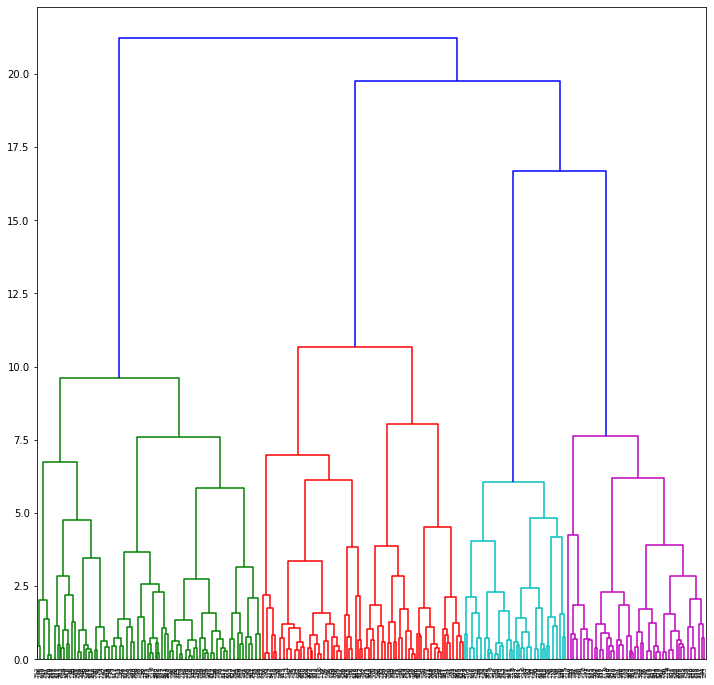

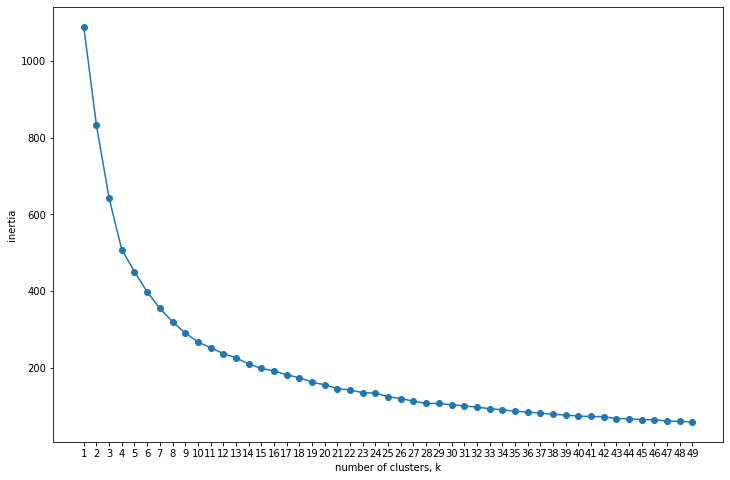

In [17]:
############### Clustering the 5 Personality Graph ###########################
#########################################################################

MSFT_graph_Big5 = linkage(y= Scaled_Big5,
                          method='ward')

#setting plotting size
fig,ax = plt.subplots(figsize=(12,12))

#developing a dendogram

dendrogram(Z=MSFT_graph_Big5,
           leaf_rotation=90,
           leaf_font_size=6)

#saving and displying the plot

plt.savefig('MSFT_graph_Clust_Big5.png')
plt.show()

#calling the inertia plot() function
#interia_plot(Scaled_Big5) 
interia_plot(data = Scaled_Big5, max_clust = 50)

<b> Dendogram Graph Explanation </b>

This diagram show personalities  clusters and how they behave. They have a high variance and are quite distinct from each other as we can see. This shows that our clusters are correct and we can move forward to giving insights. We selected 4 as the number of clusters based on the dendogram and the inertia plot above.
***

## K-means Clustering 

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centroid), serving as a prototype of the cluster.

Random State determines random number generation for centroid initialization and random reassignment.

In [18]:
##### K Clustering ###################################
Msft_k4=KMeans(n_clusters=4,random_state=802)
Msft_k4.fit(X_Big5_Msft_df)
Msft_kmeans4=pd.DataFrame({'Cluster': Msft_k4.labels_})
print(Msft_kmeans4.iloc[: , 0].value_counts())

1    120
0     93
2     78
3     72
Name: Cluster, dtype: int64


##  Big 5 Personality Centroids

This section will calculate the distance of all other features ets to centroids, classify other feature sets as same as closest centroid and then take mean of each class, making that mean the new centroid

A cluster is defined by a centroid, which is a point (either imaginary or real) at the center of a cluster

In [19]:
##### Getting the Mean of the features ############
centroids_Msft=Msft_k4.cluster_centers_
centroids_Msft_df=pd.DataFrame(centroids_Msft)
centroids_Msft_df.columns=['Obstinate Person',
                           'Outgoing Person',
                           'Cognitive Person',]
centroids_Msft_df.round(2)

,Obstinate Person,Outgoing Person,Cognitive Person
0,1.51,-0.08,-0.58
1,-1.23,0.30,-0.52
2,-0.31,-1.12,0.49
3,0.45,0.81,1.09


## Concat of the Big 5 Personality Traits

concat creates a single vector-valued column from multiple columns. It can be performed on data before training a model. The concatenation can significantly speed up the processing of data when the number of columns is as large as hundreds to thousands

In [20]:
##### Creating a single vector for the Big 5 #############
final_Msft_df=pd.concat([Msft_kmeans4,X_Big5_Msft_df],axis=1)
final_Msft_df

,Cluster,Obstinate Person,Outgoing Person,Cognitive Person
0,2,0.010433,-0.365168,0.057775
1,2,0.329933,-0.694105,0.814860
2,0,0.627004,-1.140472,-1.980724
3,3,0.127072,0.499877,0.468004
4,0,1.704062,0.529820,-0.213666
5,3,1.987753,0.889542,1.012959
6,3,1.216383,0.802569,0.812464
7,0,3.071202,0.400321,-2.452969
8,1,-1.345223,-0.026811,-1.241636
9,0,0.939318,-0.873485,-0.258197


## 5 Personality Dataset Concat

Concaeting the final dataset which includes all demographic and pca data

In [21]:
##### Big 5 Personality Concate ######################################
final_Msft_df_d=pd.concat([Msft_df.iloc[:,72:],final_Msft_df],axis=1)
final_Msft_df_d

,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?,New,New1,New2,Cluster,Obstinate Person,Outgoing Person,Cognitive Person
0,Macbook,Macbook,DD (MIB & Business Analytics),25.0,Female,ecuador,Hispanic / Latino,0.0,0.0,0.0,2.0,0.010433,-0.365168,0.057775
1,Windows laptop,Windows laptop,One year Business Analytics,27.0,Male,Ecuador,Hispanic / Latino,1.0,1.0,0.0,2.0,0.329933,-0.694105,0.814860
2,Windows laptop,Windows laptop,One year Business Analytics,25.0,Male,Indian,West Asian / Indian,0.0,0.0,0.0,0.0,0.627004,-1.140472,-1.980724
3,Windows laptop,Windows laptop,One year Business Analytics,26.0,Female,indian,West Asian / Indian,1.0,1.0,0.0,3.0,0.127072,0.499877,0.468004
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27.0,Male,China,Far east Asian,0.0,0.0,1.0,0.0,1.704062,0.529820,-0.213666
5,Macbook,Macbook,DD (MIB & Business Analytics),22.0,Male,Indian,West Asian / Indian,0.0,0.0,0.0,3.0,1.987753,0.889542,1.012959
6,Windows laptop,Macbook,DD (MIB & Business Analytics),23.0,Female,Dominican,Hispanic / Latino,0.0,1.0,0.0,3.0,1.216383,0.802569,0.812464
7,Macbook,Macbook,DD (MIB & Business Analytics),23.0,Male,Belgian,White / Caucasian,0.0,0.0,0.0,0.0,3.071202,0.400321,-2.452969
8,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25.0,Female,Swiss,White / Caucasian,0.0,0.0,0.0,1.0,-1.345223,-0.026811,-1.241636
9,Macbook,Macbook,DD (MBA & Business Analytics),38.0,Male,Japan,Far east Asian,0.0,0.0,0.0,0.0,0.939318,-0.873485,-0.258197


# Hult DNA PCA

Hult beleive that the understanding of who someone is and why they react in a certain way to external influences is crucial in a business setting.  A person can have an IQ off the charts but if they don’t have self-awareness then it will be difficult for them to respond effectively in a wide range of business contexts. 
    
This is why they came up with Hult DNA, skills and attributes which helps a human being in building self awareness and becoming emotionally intelligent. 

## Grouping the Hult DNA

In this section, Question 51 - 71 be divided into 9 sections: 

<b> Thinking </b>
     
        Shows Self-Awareness
        Embraces Change
        Demonstrates Dynamic Thinking

<b> Communicating </b>

        Speaks & Listens Skillfully
        Influences Confidently
        Presents Ideas Effectively
        
<b> Team Building </b>

        Foster Collaborative Relationships
        Inspires Productivity
        Resolves Conflict Constructively    

In [22]:
############### Defining the Hult DNA in the DataFrame ###########################
#########################################################################
Msft_hult_df = Msft_df.iloc[:,51:-7]

Msft_hult_df.head()

,See underlying patterns in complex situations,Don't generate ideas that are new and different,Demonstrate an awareness of personal strengths and limitations,Display a growth mindset,Respond effectively to multiple priorities,"Take initiative even when circumstances, objectives, or rules aren't clear",Encourage direct and open discussions,Respond effectively to multiple priorities.1,"Take initiative even when circumstances, objectives, or rules aren't clear.1",Encourage direct and open discussions.1,Listen carefully to others,Don't persuasively sell a vision or idea,Build cooperative relationships,Work well with people from diverse cultural backgrounds,"Effectively negotiate interests, resources, and roles",Can't rally people on the team around a common goal,Translate ideas into plans that are organized and realistic,Resolve conflicts constructively,Seek and use feedback from teammates,Coach teammates for performance and growth,Drive for results,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?
0,4,4,4,4,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics)
1,4,4,2,4,4,4,5,5,5,5,5,4,4,4,2,3,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics
2,3,4,5,3,5,2,3,5,2,3,3,4,3,4,4,4,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics
3,3,3,3,5,5,5,4,4,4,4,5,3,5,5,5,1,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics
4,3,3,5,3,3,3,3,3,3,4,4,2,3,3,4,2,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation)


In [23]:
############### Hult DNA with the 8 Personality Characteristics ###########################
#########################################################################

#1 Shows Self-Awareness
Msft_hult_df['Shows Self-Awareness'] = Msft_hult_df.iloc[:, 2] 

#2 Embraces Change
Msft_hult_df['Embraces Change'] = Msft_hult_df.iloc[:, 3] 


#3 Demonstrates Dynamic Thinking
Msft_hult_df['Demonstrates Dynamic Thinking'] = Msft_hult_df.iloc[:, 0]+\
                                                Msft_hult_df.iloc[:, 5]+\
                                                Msft_hult_df.iloc[:, 1] 


#4 Speaks & Listens Skillfully
Msft_hult_df['Speaks & Listens Skillfully'] = Msft_hult_df.iloc[:, 4]+\
                                              Msft_hult_df.iloc[:, 10]+\
                                              Msft_hult_df.iloc[:, 11]


#5 Influences Confidently
Msft_hult_df['Influences Confidently'] = Msft_hult_df.iloc[:, 11] 


#6 Presents Ideas Effectively
Msft_hult_df['Presents Ideas Effectively'] = Msft_hult_df.iloc[:, 16] 


#7 Foster collaborative relationships
Msft_hult_df['Foster Collaborative Relationships'] = Msft_hult_df.iloc[:, 12] +\
                                                     Msft_hult_df.iloc[:, 13] +\
                                                     Msft_hult_df.iloc[:, 18]

#8 Inspires Productivity
Msft_hult_df['Inspires Productivity'] = Msft_hult_df.iloc[:, 19]+\
                                        Msft_hult_df.iloc[:, 20] +\
                                        Msft_hult_df.iloc[:, 4]


#9 Resolves Conflict Constructively
Msft_hult_df['Resolves Conflict Constructively'] = Msft_hult_df.iloc[:, 17]



hult_dna = Msft_hult_df[['Shows Self-Awareness','Embraces Change','Demonstrates Dynamic Thinking','Speaks & Listens Skillfully','Influences Confidently','Presents Ideas Effectively','Foster Collaborative Relationships','Inspires Productivity','Resolves Conflict Constructively']]

#Checking if the hult_dna_9 was create right  
hult_dna.head()

,Shows Self-Awareness,Embraces Change,Demonstrates Dynamic Thinking,Speaks & Listens Skillfully,Influences Confidently,Presents Ideas Effectively,Foster Collaborative Relationships,Inspires Productivity,Resolves Conflict Constructively
0,4,4,12,11,3,4,12,12,4
1,2,4,12,13,4,4,13,13,5
2,5,3,9,12,4,4,10,13,2
3,3,5,11,13,3,3,15,15,5
4,5,3,9,9,2,3,9,9,3


## Standard Scaler

    Scaling the data is very important before running the analysis. Scaling the data will help in normalizing the data.

In [24]:
############### Hult DNA Standard Scaler  ###########################
#########################################################################

Scaler_Dna = StandardScaler()

############## fitting the Hult DNA DataFrame #####################
scaler.fit(hult_dna)

############### Transforming the data ############################
X_hult_scaled = scaler.transform(hult_dna)

############### Creating the data frame with the scaled data #############
hult_dna_scaled = pd.DataFrame(X_hult_scaled)

############## renaming the columns for the new data set ###################
hult_dna_scaled.columns = hult_dna.columns

############# checking pre and post scaling variance ########################
print(pd.np.var(hult_dna),'\n\n')
print(pd.np.var(hult_dna_scaled))


Shows Self-Awareness                  0.583901
Embraces Change                       0.536454
Demonstrates Dynamic Thinking         3.582648
Speaks & Listens Skillfully           2.599291
Influences Confidently                1.014184
Presents Ideas Effectively            0.585904
Foster Collaborative Relationships    2.863739
Inspires Productivity                 3.192466
Resolves Conflict Constructively      0.526148
dtype: float64 


Shows Self-Awareness                  1.0
Embraces Change                       1.0
Demonstrates Dynamic Thinking         1.0
Speaks & Listens Skillfully           1.0
Influences Confidently                1.0
Presents Ideas Effectively            1.0
Foster Collaborative Relationships    1.0
Inspires Productivity                 1.0
Resolves Conflict Constructively      1.0
dtype: float64


## Plotting the (Scree Plot) Standard Scaler

    Plotting the Scree plot is advantageous in examining the pattern of decreasing variability attributable to each of the hult DNA component in order to enlighten the selection of how many components should be considered relevant for interpretation

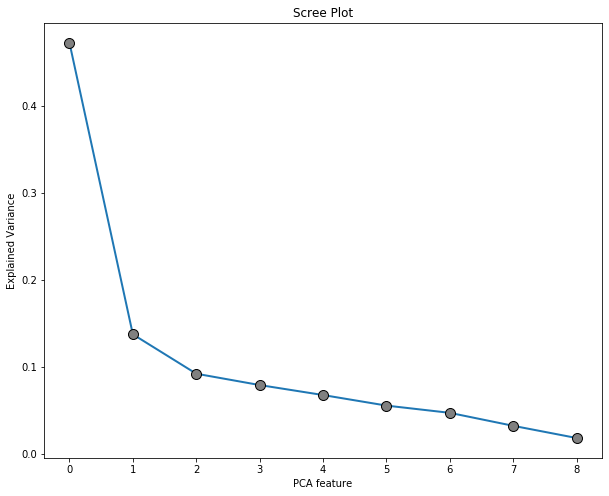

In [25]:
# Instanting a PCA object with no limit to principal components
hult_Msft = PCA (n_components= None, random_state=802)

# fitting and transforming
hult_Msft_ft = hult_Msft.fit_transform(hult_dna_scaled)

#calling the scree_plot
scree_plot(pca_object = hult_Msft)

##  Component Standard Scaler Plot

In Analyzing the Scree plot, there slope id downward facing, we decided to pick 3 points (0-2) as the optimal values, because the slope became flatter after that.

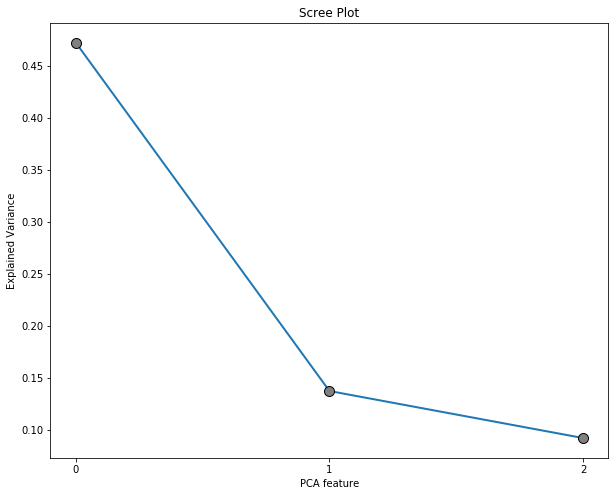

In [26]:
################### Instanting a PCA New Model  ######################
######################################################################

# Instantiating a new model using the 3 principal components #
hult_Msft_3 = PCA(n_components = 3,
                  random_state = 802)


# fitting and transforming the scaled data #
hult_Msft_ft = hult_Msft_3.fit_transform(hult_dna_scaled)

# Plotting the scree plot with 3 components #
scree_plot(pca_object = hult_Msft_3)

##  Comparing the PCA Standard Models 

In this section, we are comparing the 2 Hult DNA PCA models, the original one and the modified PCA model with 3 components. 

In [27]:
################### Unlimited component PCA model  ######################
#########################################################################

# transposing pca components (pc = MAX)
FL_hult_Msft = pd.DataFrame(pd.np.transpose(hult_Msft.components_))


# naming rows as original features
FL_hult_Msft = FL_hult_Msft.set_index(hult_dna.columns)


### 3 component PCA model ###

# transposing pca components (pc = 3)
FL_hult_Msft_3 = pd.DataFrame(pd.np.transpose(hult_Msft_3.components_))


# naming rows as original features
FL_hult_Msft_3 = FL_hult_Msft_3.set_index(hult_dna.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{FL_hult_Msft.round(2)}


3 Components Factor Loadings
------------------------------
{FL_hult_Msft_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                                       0     1     2     3     4     5     6     7     8
Shows Self-Awareness               -0.28  0.20  0.65 -0.20  0.49 -0.35  0.19 -0.10  0.07
Embraces Change                    -0.34  0.08  0.38 -0.24 -0.44  0.60  0.23  0.26  0.03
Demonstrates Dynamic Thinking      -0.32  0.02 -0.32 -0.63 -0.39 -0.42  0.03 -0.27 -0.04
Speaks & Listens Skillfully        -0.38 -0.44  0.11  0.15  0.04 -0.02 -0.19  0.01 -0.77
Influences Confidently             -0.19 -0.80  0.06  0.07  0.00 -0.04  0.11 -0.10  0.54
Presents Ideas Effectively         -0.31  0.02 -0.52 -0.22  0.61  0.40  0.23  0.04 -0.01
Foster Collaborative Relationships -0.38  0.26  0.01  0.36 -0.07  0.24 -0.28 -0.70  0.16
Inspires Productivity              -0.40  0.14 -0.09  0.05  0.04 -0.16 -0.62  0.56  0.29
Resolves Conflict Constructively   -0.34  0.18 -0.20  0.54 -0.19 -0.31  0.58  0.21  0.00


3 Components Factor Loadings
----------------

## Naming the PCA Models 

The reasoning behind the names id from the 3 component factor loading model above.

We named the first group "Chill Group" because they had negative in nearly every category and they were opposite the Hult dna

The 2nd group was named "Following Group" because they were lacking in self awareness and leadership data so they were put into this group

The 3rd group was named "Leading Group" because  had good leadership skills and self awareness

In [28]:
############# Naming the PCA's for the Hult DNA  ###########
#########################################################################

FL_hult_Msft_3.columns=['Chill Group', 
                      'Following Group',
                      'Leading Group']

##### Checking the results #####
FL_hult_Msft_3.round(2)

,Chill Group,Following Group,Leading Group
Shows Self-Awareness,-0.28,0.20,0.65
Embraces Change,-0.34,0.08,0.38
Demonstrates Dynamic Thinking,-0.32,0.02,-0.32
Speaks & Listens Skillfully,-0.38,-0.44,0.11
Influences Confidently,-0.19,-0.80,0.06
Presents Ideas Effectively,-0.31,0.02,-0.52
Foster Collaborative Relationships,-0.38,0.26,0.01
Inspires Productivity,-0.40,0.14,-0.09
Resolves Conflict Constructively,-0.34,0.18,-0.20


## Analyzing Customers based on Hult DNA 

Analyzing the customers will help in understanding the customers, hence finding out which customer category Microsoft should be focus on amd what the attributes are for the customers. 

In [29]:
############### Analyzing factor strengths per customer  ###############
#########################################################################
X_hult_Msft_reduced = hult_Msft_3.transform(hult_dna_scaled)

# converting to a DataFrame
X_hult_Msft_df = pd.DataFrame(X_hult_Msft_reduced)
X_hult_Msft_df.columns=['Chill Group', 
                      'Following Group',
                      'Leading Group']

# checking the results
X_hult_Msft_df

,Chill Group,Following Group,Leading Group
0,0.120358,0.210361,-0.286245
1,-0.712710,-1.156650,-2.122879
2,1.456573,-1.466414,1.170105
3,-1.687022,0.434596,-0.056849
4,3.604254,0.675576,1.460848
5,2.186614,0.645566,-0.090686
6,-1.512044,-0.354773,-0.036458
7,-2.061248,0.979589,0.218654
8,-0.288035,0.238230,-0.966415
9,0.626608,0.173213,0.218628


## Clustering  The Hult DNA

   Clustering will give us the understanding how many clusters we need for our analysis. This is done through the dendogram and the inertia plot after scaling the data once again to restore the equal variance that was lost through the PCA analysis.

In [30]:
############### Clustering the 3 Personality  ###########################
#########################################################################

pd.np.var(FL_hult_Msft)

#Instantiating a StandaradScaler ()object
hult_scaler=StandardScaler()

#Fitting the scaler data
hult_scaler.fit(X_hult_Msft_df)

#Transforming our data after fit
X_hult_scaled = hult_scaler.transform(X_hult_Msft_df)

#converting scaled data into a DataFrame
Scaled_hult=pd.DataFrame(X_hult_scaled)

#reattaching the columns
Scaled_hult.columns=['Chill Group', 
                      'Following Group',
                      'Leading Group']
                    

#checking pre-post scaling variance
print(pd.np.var(FL_hult_Msft_3),'\n\n')
print(pd.np.var(Scaled_hult))

Chill Group        0.003761
Following Group    0.109786
Leading Group      0.111049
dtype: float64 


Chill Group        1.0
Following Group    1.0
Leading Group      1.0
dtype: float64


## Developing a Dendogram

A dendrogram is a diagram representing a tree. This diagrammatic representation is frequently used to find out the optimum number of clusters.. In clustering, hierarchy is used to give analysis based on the position of each cluster. This diagram, shows our three personality clusters and how they behave. They have a high variance and are quite distinct from each other. This shows that, our clusters are correct and we can move forward to giving insights

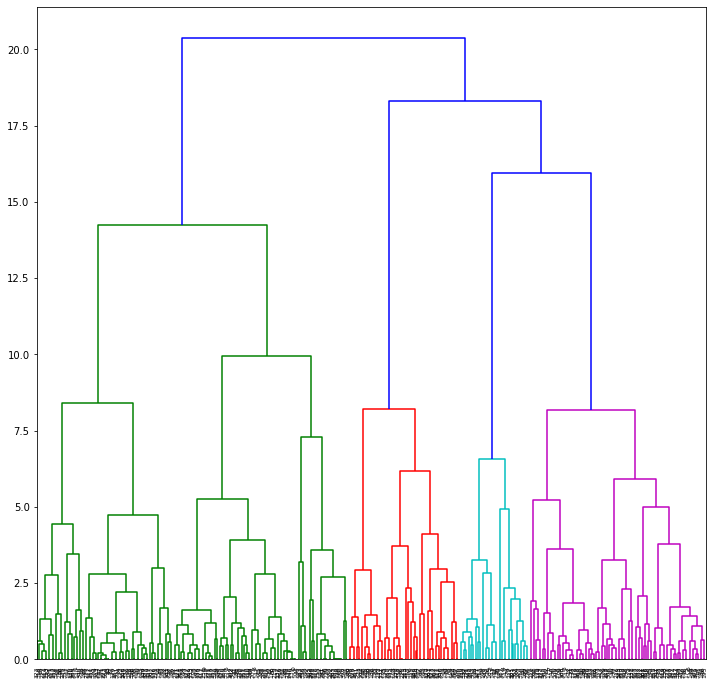

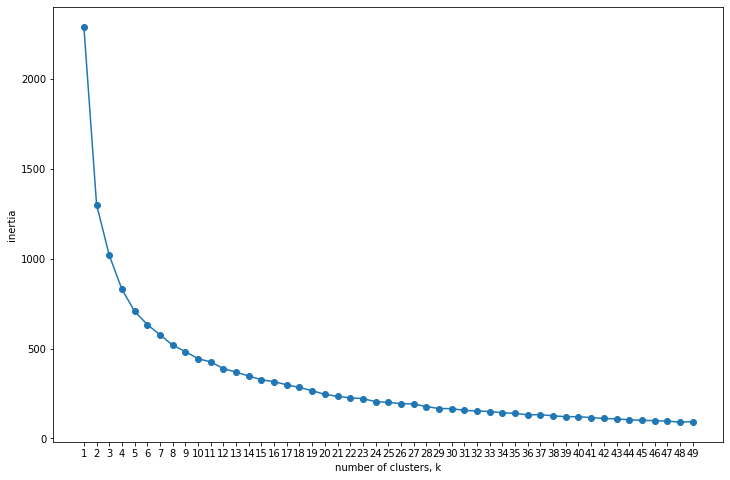

In [31]:
############### Clustering the 3 Personality Graph ###########################
#########################################################################

MSFT_graph_hult = linkage(y= Scaled_hult,
                          method='ward')

#setting plotting size
fig,ax = plt.subplots(figsize=(12,12))

#developing a dendogram

dendrogram(Z=MSFT_graph_hult,
           leaf_rotation=90,
           leaf_font_size=6)

#saving and displying the plot

plt.savefig('MSFT_graph_Clust_hult.png')
plt.show()

#calling the inertia plot() function
#interia_plot(X_hult_Msft_df) 
interia_plot(data = X_hult_Msft_df, max_clust = 50)

## K-Means Clustering (Hult DNA)

K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

In [32]:
##### K Clustering ######################################
hult_k3=KMeans(n_clusters=4,random_state=802)
hult_k3.fit(X_hult_Msft_df)
hult_kMeans3=pd.DataFrame({'Cluster': hult_k3.labels_})
print(hult_kMeans3.iloc[: , 0].value_counts()) 

2    123
0     96
1     81
3     63
Name: Cluster, dtype: int64


## Hult DNA Centroids

This section will calculate the distance of all other features ets to centroids, classify other feature sets as same as closest centroid and then take mean of each class, making that mean the new centroid

In [33]:
##### Getting the Mean of the features ############
centroids_pca_hult=hult_k3.cluster_centers_
centroids_pca_hult_df=pd.DataFrame(centroids_pca_hult)
centroids_pca_hult_df.columns=['Chill Group', 
                      'Following Group',
                      'Leading Group']
centroids_pca_hult_df.round(2) 



,Chill Group,Following Group,Leading Group
0,-2.39,-0.37,-0.07
1,2.85,0.03,-0.00
2,0.26,-0.57,-0.03
3,-0.54,1.63,0.16


## Concat of the Hult DNA

concat creates a single vector-valued column from multiple columns. It can be performed on data before training a model. The concatenation can significantly speed up the processing of data when the number of columns is as large as hundreds to thousands

In [34]:
##### Creating a single vector for the hult DNA #############
final_hult_df=pd.concat([hult_kMeans3,X_hult_Msft_df],axis=1)
final_hult_df

,Cluster,Chill Group,Following Group,Leading Group
0,2,0.120358,0.210361,-0.286245
1,2,-0.712710,-1.156650,-2.122879
2,2,1.456573,-1.466414,1.170105
3,0,-1.687022,0.434596,-0.056849
4,1,3.604254,0.675576,1.460848
5,1,2.186614,0.645566,-0.090686
6,0,-1.512044,-0.354773,-0.036458
7,0,-2.061248,0.979589,0.218654
8,2,-0.288035,0.238230,-0.966415
9,2,0.626608,0.173213,0.218628


## Hult DNA Final Concat

In [35]:
##### Concating the Final Hult DNA #######################
final_hult_df_d=pd.concat([Msft_df.iloc[:,72:],final_hult_df],axis=1)
final_hult_df_d


,What laptop do you currently have?,What laptop would you buy in next assuming if all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality?,What is your ethnicity?,New,New1,New2,Cluster,Chill Group,Following Group,Leading Group
0,Macbook,Macbook,DD (MIB & Business Analytics),25.0,Female,ecuador,Hispanic / Latino,0.0,0.0,0.0,2.0,0.120358,0.210361,-0.286245
1,Windows laptop,Windows laptop,One year Business Analytics,27.0,Male,Ecuador,Hispanic / Latino,1.0,1.0,0.0,2.0,-0.712710,-1.156650,-2.122879
2,Windows laptop,Windows laptop,One year Business Analytics,25.0,Male,Indian,West Asian / Indian,0.0,0.0,0.0,2.0,1.456573,-1.466414,1.170105
3,Windows laptop,Windows laptop,One year Business Analytics,26.0,Female,indian,West Asian / Indian,1.0,1.0,0.0,0.0,-1.687022,0.434596,-0.056849
4,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27.0,Male,China,Far east Asian,0.0,0.0,1.0,1.0,3.604254,0.675576,1.460848
5,Macbook,Macbook,DD (MIB & Business Analytics),22.0,Male,Indian,West Asian / Indian,0.0,0.0,0.0,1.0,2.186614,0.645566,-0.090686
6,Windows laptop,Macbook,DD (MIB & Business Analytics),23.0,Female,Dominican,Hispanic / Latino,0.0,1.0,0.0,0.0,-1.512044,-0.354773,-0.036458
7,Macbook,Macbook,DD (MIB & Business Analytics),23.0,Male,Belgian,White / Caucasian,0.0,0.0,0.0,0.0,-2.061248,0.979589,0.218654
8,Windows laptop,Windows laptop,DD (MIB & Business Analytics),25.0,Female,Swiss,White / Caucasian,0.0,0.0,0.0,2.0,-0.288035,0.238230,-0.966415
9,Macbook,Macbook,DD (MBA & Business Analytics),38.0,Male,Japan,Far east Asian,0.0,0.0,0.0,2.0,0.626608,0.173213,0.218628


# Analyzing the remaining Data

    There are 78 Questions in the survey data set. Above we have analyzed the 5 Personality traits (Q1 - Q5), and then Hult DNA (51- 71) hence remaining 7 questions which will be analyzed in this section.

    

## Splitting the Datas 

In [36]:
#####################################################
# Split the  Data
#######################################################

Msft_redata = pd.DataFrame(Msft_df.iloc[:, 72:79])
Msft_redata.insert(0, 'ID', Msft_df.loc[:,'surveyID'], allow_duplicates= False)

# split persona
Msft_per = Msft_df.drop ((Msft_df.iloc[:,72:79]), axis=1)
Msft_per = Msft_df.drop('New', axis = 1)
Msft_per = Msft_df.drop('New1', axis = 1)
Msft_per = Msft_df.drop('New2', axis = 1)


## Combining 

In [37]:
###################
# Combining Demographics with Big5 and DNA
###################

#concatenating demographic information with pca clusters
final_pca_clust_df=pd.concat([Msft_redata.loc[:,:],final_Msft_df, final_hult_df],axis=1)

#renaming Columns
final_pca_clust_df.columns=['ID','What laptop do you currently have?',
                            'What laptop would you buy in next assuming of all laptops cost the same?',
                            'What program are you in?','What is your age?',
                            'Gender','What is your nationality',
                            'What is your ethnicity?',
                            'Mfts5 Cluster',
                            'Obstinate Person', 
                            'Outgoing Person',
                            'Cognitive Person',
                            'Hult DNA Cluster',
                            'Chill Group', 
                            'Following Group',
                            'Leading Group']

# Check the results
final_pca_clust_df.head(n=5)

,ID,What laptop do you currently have?,What laptop would you buy in next assuming of all laptops cost the same?,What program are you in?,What is your age?,Gender,What is your nationality,What is your ethnicity?,Mfts5 Cluster,Obstinate Person,Outgoing Person,Cognitive Person,Hult DNA Cluster,Chill Group,Following Group,Leading Group
0,a1000,Macbook,Macbook,DD (MIB & Business Analytics),25.0,Female,ecuador,Hispanic / Latino,2.0,0.010433,-0.365168,0.057775,2.0,0.120358,0.210361,-0.286245
1,a1001,Windows laptop,Windows laptop,One year Business Analytics,27.0,Male,Ecuador,Hispanic / Latino,2.0,0.329933,-0.694105,0.814860,2.0,-0.712710,-1.156650,-2.122879
2,a1002,Windows laptop,Windows laptop,One year Business Analytics,25.0,Male,Indian,West Asian / Indian,0.0,0.627004,-1.140472,-1.980724,2.0,1.456573,-1.466414,1.170105
3,a1003,Windows laptop,Windows laptop,One year Business Analytics,26.0,Female,indian,West Asian / Indian,3.0,0.127072,0.499877,0.468004,0.0,-1.687022,0.434596,-0.056849
4,a1004,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27.0,Male,China,Far east Asian,0.0,1.704062,0.529820,-0.213666,1.0,3.604254,0.675576,1.460848


# Analyzing Consumers Laptop Selection

    In this section, we will visually analyze consumers current laptops, there intended feature switch and how many people will switch from either Apple to Microsoft and Vice-Versa.

## Consumers Current Laptop

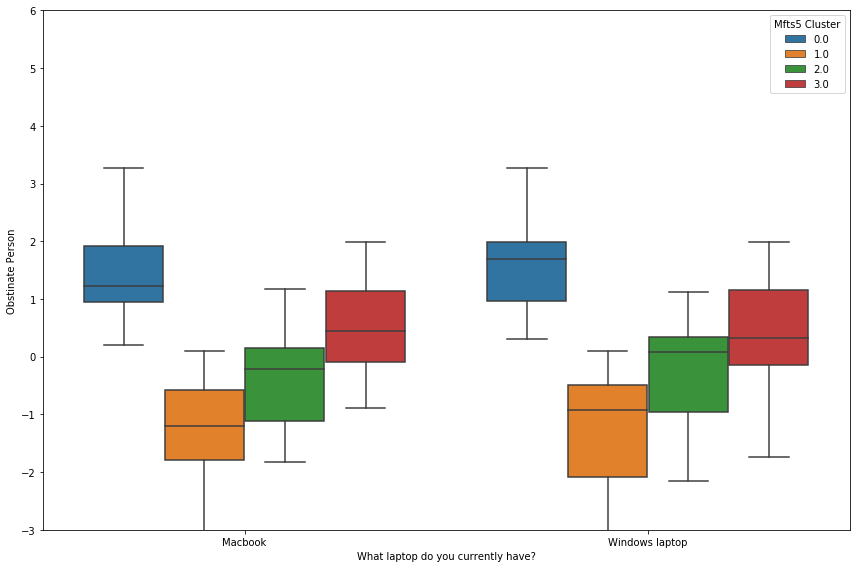

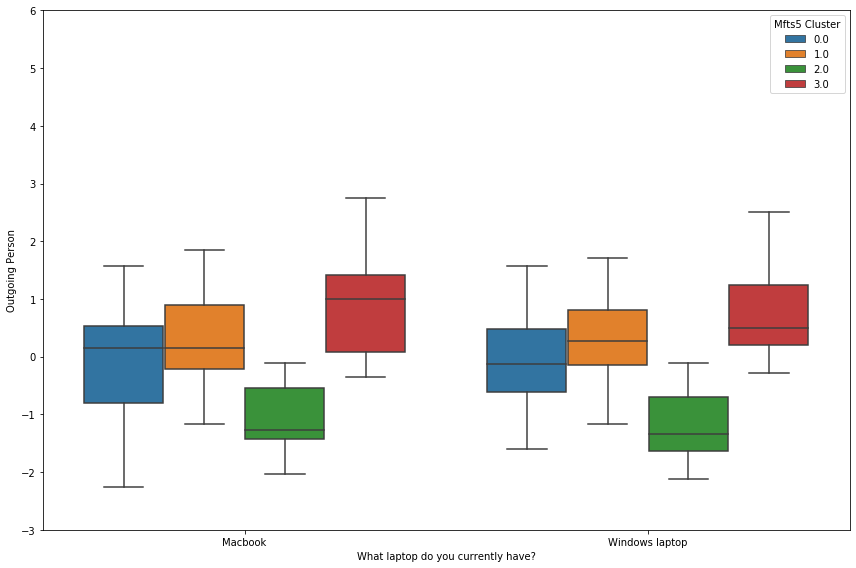

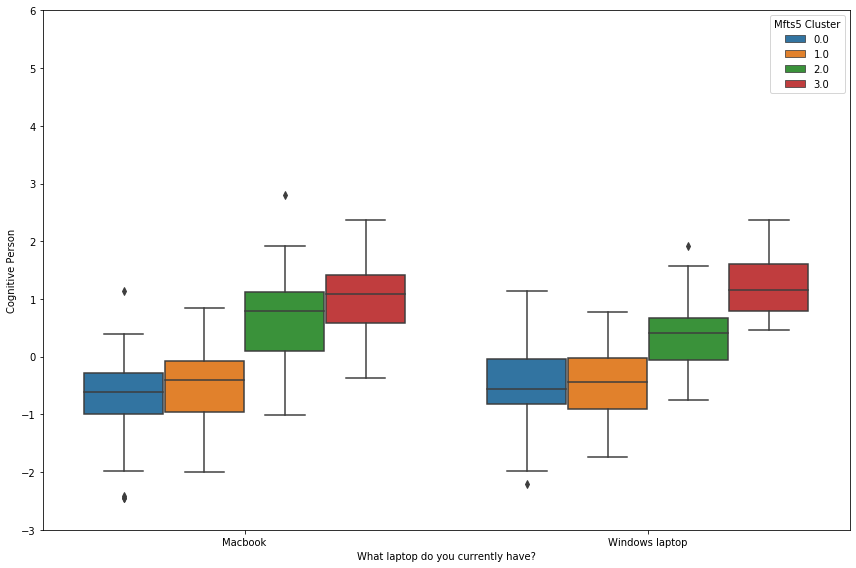

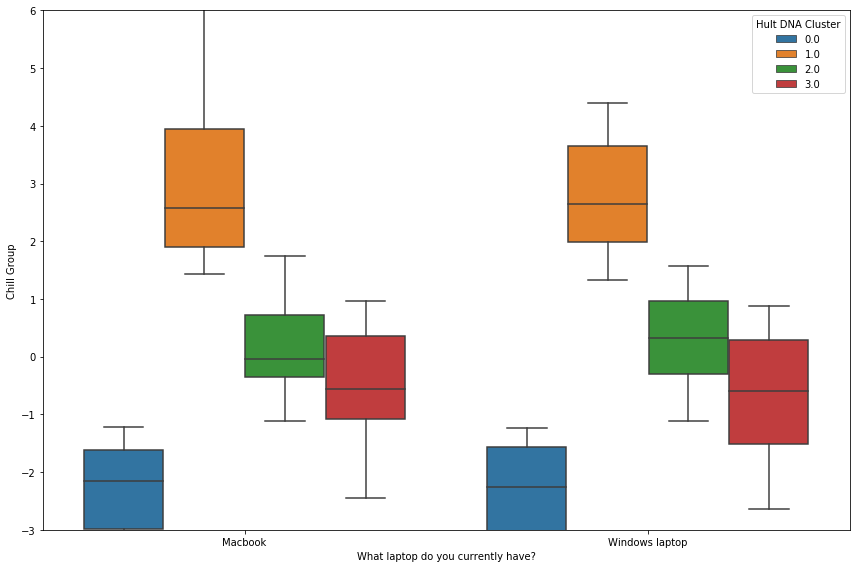

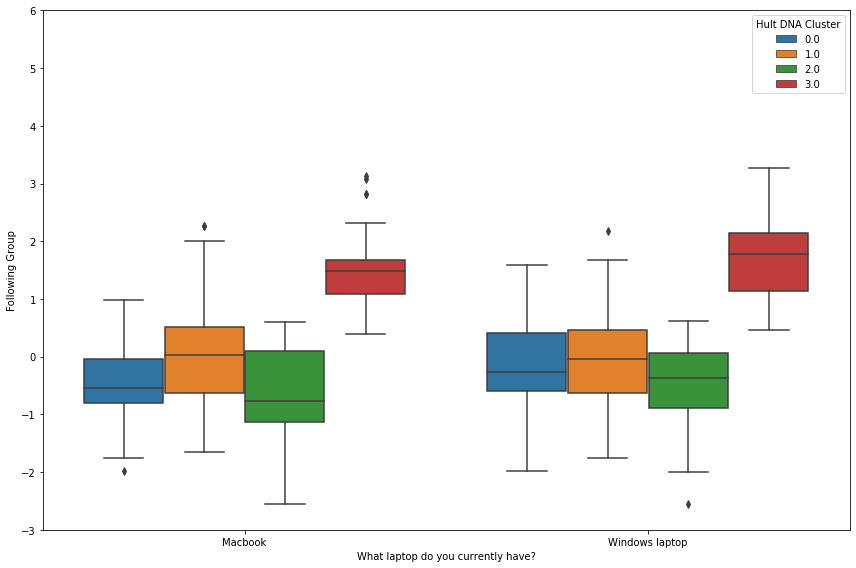

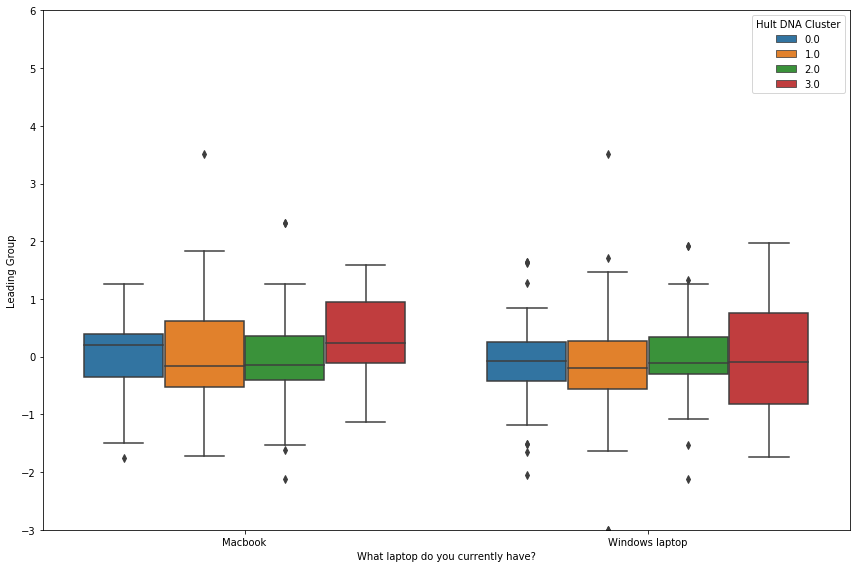

In [38]:
##########################################
### 'What laptop do you currently have?'
##########################################
# Obstinate Person

fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x='What laptop do you currently have?',
           y = 'Obstinate Person',
           hue = 'Mfts5 Cluster',
           data = final_pca_clust_df
           )

plt.ylim(-3,6)
plt.tight_layout()
plt.show()

# Outgoing Person
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x='What laptop do you currently have?',
           y = 'Outgoing Person',
           hue = 'Mfts5 Cluster',
           data = final_pca_clust_df
           )

plt.ylim(-3,6)
plt.tight_layout()
plt.show()


#Cognitive Person
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x='What laptop do you currently have?',
           y = 'Cognitive Person',
           hue = 'Mfts5 Cluster',
           data = final_pca_clust_df
           )

plt.ylim(-3,6)
plt.tight_layout()
plt.show()

#Chill Group
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x='What laptop do you currently have?',
           y = 'Chill Group',
           hue = 'Hult DNA Cluster',
           data = final_pca_clust_df
           )

plt.ylim(-3,6)
plt.tight_layout()
plt.show()

# Following Group
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x='What laptop do you currently have?',
           y = 'Following Group',
           hue = 'Hult DNA Cluster',
           data = final_pca_clust_df
           )

plt.ylim(-3,6)
plt.tight_layout()
plt.show()

#Leading Group
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x='What laptop do you currently have?',
           y = 'Leading Group',
           hue = 'Hult DNA Cluster',
           data = final_pca_clust_df
           )

plt.ylim(-3,6)
plt.tight_layout()
plt.show()





## New Laptop Purchase 

   This section will visually represent which group will buy a Microsoft laptop over Apple laptop.

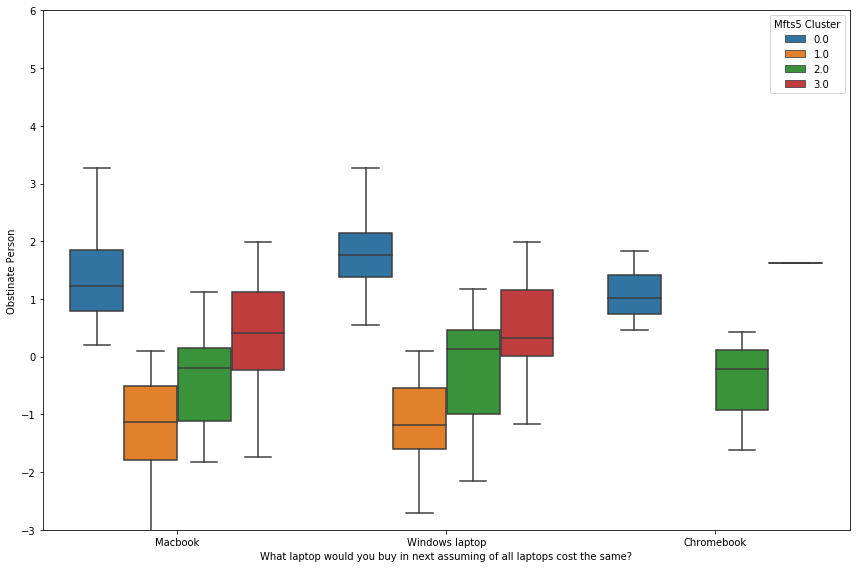

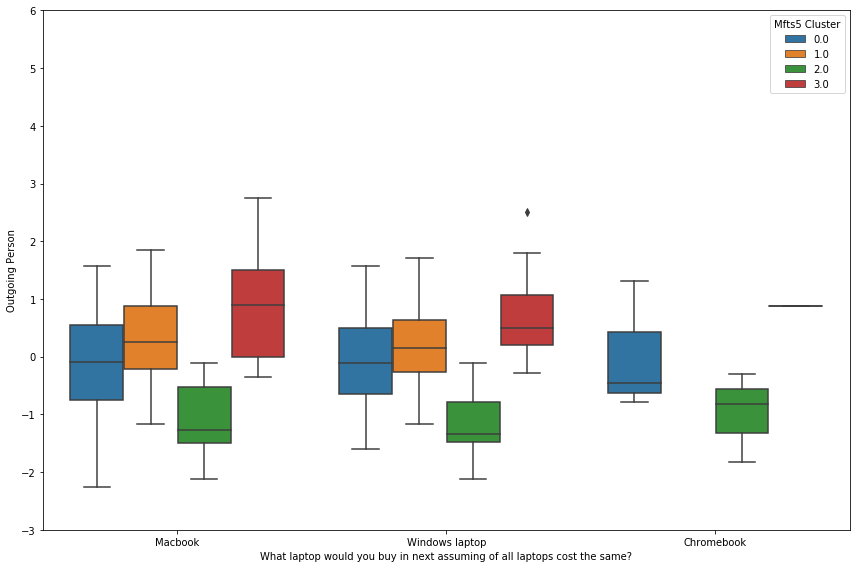

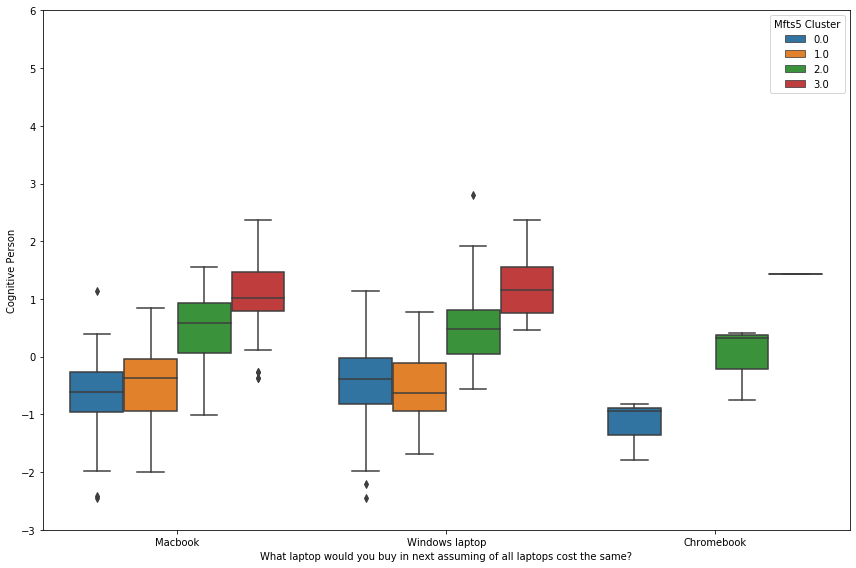

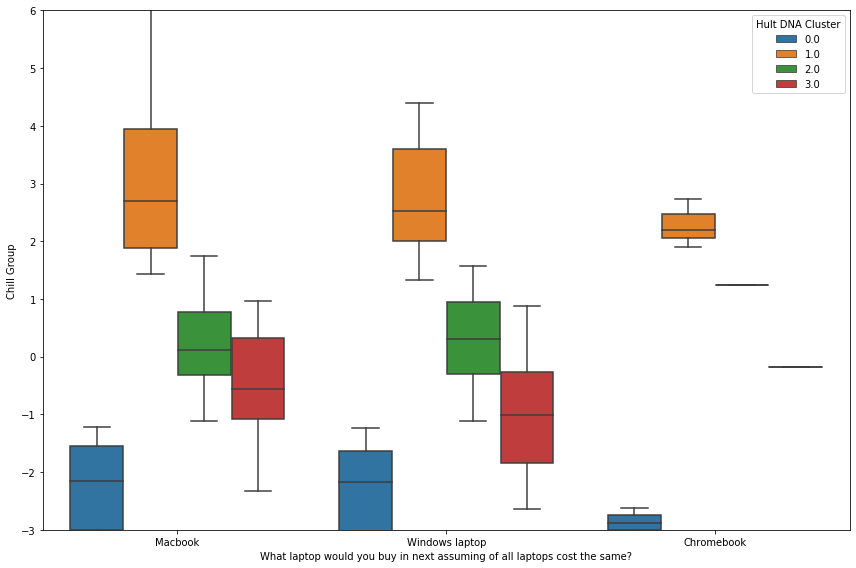

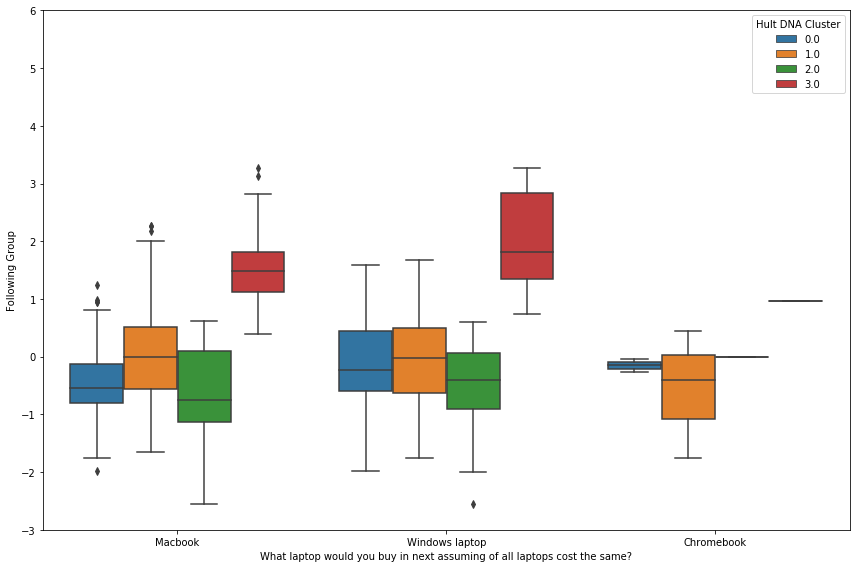

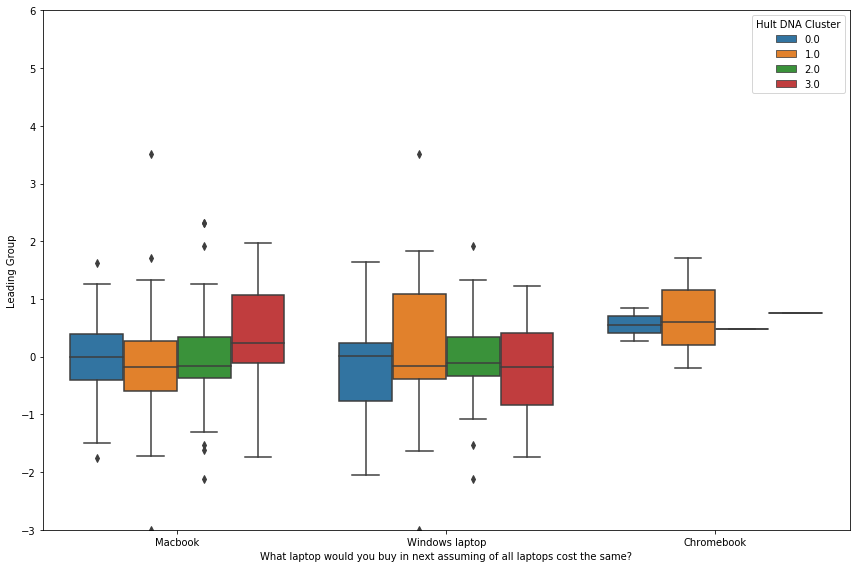

In [39]:
##########################################
### What laptop would you buy in next assuming if all laptops cost the same?'
##########################################
# Obstinate Person
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x='What laptop would you buy in next assuming of all laptops cost the same?',
           y = 'Obstinate Person',
           hue = 'Mfts5 Cluster',
           data = final_pca_clust_df
           )

plt.ylim(-3,6)
plt.tight_layout()
plt.show()

# Outgoing Person
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x='What laptop would you buy in next assuming of all laptops cost the same?',
           y = 'Outgoing Person',
           hue = 'Mfts5 Cluster',
           data = final_pca_clust_df
           )

plt.ylim(-3,6)
plt.tight_layout()
plt.show()


#Cognitive Person
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x='What laptop would you buy in next assuming of all laptops cost the same?',
           y = 'Cognitive Person',
           hue = 'Mfts5 Cluster',
           data = final_pca_clust_df
           )

plt.ylim(-3,6)
plt.tight_layout()
plt.show()

# Chill Group
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x='What laptop would you buy in next assuming of all laptops cost the same?',
           y = 'Chill Group',
           hue = 'Hult DNA Cluster',
           data = final_pca_clust_df
           )

plt.ylim(-3,6)
plt.tight_layout()
plt.show()

# Following Group
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x='What laptop would you buy in next assuming of all laptops cost the same?',
           y = 'Following Group',
           hue = 'Hult DNA Cluster',
           data = final_pca_clust_df
           )

plt.ylim(-3,6)
plt.tight_layout()
plt.show()

# Leading Group
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(x='What laptop would you buy in next assuming of all laptops cost the same?',
           y = 'Leading Group',
           hue = 'Hult DNA Cluster',
           data = final_pca_clust_df
           )

plt.ylim(-3,6)
plt.tight_layout()
plt.show()




## Explanation of Box Plot 

    This section will explain the New Laptop Purchase boxplot above. 
    
### Big Five Personality Trait Group

<b>Obstinate Person </b>
    
Consumers from the Obstinate group, we can see: in the first cluster, people are willing to buy Windows laptop more than Macbook. In the second and forth clusters, the likelyhood to buy either Macbook or Windows laptop are kind of similar. In the third cluster, people are more likely to buy Windows laptop, Macbook and Chromebook are kind of similar. 
***

<b>Outgoing Person </b> 

Consumers from this Outgoing group, we can see: in the first and second cluster, the likelyhood of buying Macbook and Windows laptop are kind of the same. But the interesting part is, people from the third cluster are more willing to buy Chromebook more than other 2. And people from the forth cluster are willing to buy Windows laptop more than Macbook. 
***

<b>Cognitive Person </b>

Consumers from the Cognitive group, we can see: in the first and forth clusters, people are more willing to buy Windows than Macbook. People are more willing to buy Macbook more than Windows laptop in the second cluster but have kind of similar likelyhood from the third cluster. 
***

### Hult DNA Group 

<b>Chill Group </b>

Consumers from the chill group, we can see: people are kind of have the same likelyhood between Macbook and Windows laptop, instead of the forth cluster. People tend to choose Macbook rather than Windows laptop. And almost nobody wants to buy Chromebook. 
***

<b>Following Group </b>

Consumers from the following cluster are a little more likely to choose Windows Laptop than Macbook. Rest of them are kind of having the similar likelyhood. But there are only few people from second cluster will choose chromebook, most of them wouldn't even choose Chromebook. 
***

<b>Leading Group </b>

Consumers from the leading group likelyhood between Macbook and Windows are all pretty similar. The interesting part is that the consumers from the first and the second clusters are a little bit more willing to choose Chromebook than others. But almost no one would use Chromebook in the third and the forth clusters. 

## Switching Analysis 

    This section will analysis how many customers are willing to switch from Apple to windows. 

In [40]:
##### Switching ################################
switch= Msft_df.iloc[:,72:74]
switch

##### Swiching Counting #########################
switch.count()

What laptop do you currently have?                                          363
What laptop would you buy in next assuming if all laptops cost the same?    363
dtype: int64

In [41]:
##### Calculating consumers who will switch from Apple to Microsoft #######
mask1 = (switch['What laptop do you currently have?'] == 'Macbook')
mask2 = (switch['What laptop would you buy in next assuming if all laptops cost the same?'] == 'Windows laptop')
switch[mask1 & mask2].count()


What laptop do you currently have?                                          16
What laptop would you buy in next assuming if all laptops cost the same?    16
dtype: int64

In [42]:
##### Calculating consumers who will switch from Microsoft to Apple #######
Apple1 = (switch['What laptop do you currently have?'] == 'Windows laptop')
Apple2 = (switch['What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook')
switch[Apple1 & Apple2].count()

What laptop do you currently have?                                          35
What laptop would you buy in next assuming if all laptops cost the same?    35
dtype: int64

## Analysis Conclusion 

During our analysis, we split the big 5 personality traits into 3 variables which best defines all of them. The Hult DNA was also broken down into 3 variables which best defines it. 
    
In our analysis that students who use either laptops seems to be content with their current laptop software (Apple or Windows) and will most likely buy the same laptop if the need arises. But a little percentage of them are willing to switch, more window users would switch to apple than apple users who will switch to windows.
    
    51.03% of Students currently use Apple
    48.97% of Students currently use Microsoft
    83.5% of students will buy the same laptop while 
    4.1% of Apple users will switch to windows and 
    8.9% of Windows  users will switch to Apple. 
    
In a research done in may 24th 2019 by OWC Mark C, the study was done with over 2,200 college students to understand the percentage of people who prefer Mac over PC (Windows). 71% either have a Mac or wish they did and only 29% would choose PC over Mac. Break down of the number 

    • 40% use Mac
    • 31% use PC but prefer Mac
    • 29% use and prefer PC
 
 Students where asked why they prefer Mac to PC, Below find the top 7 Answers 
 
 "https://blog.macsales.com/48820-what-percent-of-people-prefer-mac-over-pc/"
 
<b> Reasons why Consumers Prefer PC over MAC </b>

There are so many reasons why consumers prefre windows to mac, below please find some of the reasons. 

    Interface Customization: One of the many reasons why computer users prefer Windows over Mac is that the former offers better customization options.
    
    Hardware Customization: PC users also have an advantage which Mac users miss out on when it comes to hardware customization. For instance, Mac users have no choice but to opt for an external hard drive to expand their storage capacity, whereas a PC user can easily customize the specs of their computer to enjoy an enhanced experience. PC holds a clear edge over its nemesis by offering better hardware customization options.
    
    Compatibility: Getting compatible software and peripherals for a PC is much easier than for a Mac. 
    
    PC Gamers: Consumers who love to play computer games prefre windows over Mac because it is more compartible. It lets them play online multiplayer games together. Windows PCs have far more software created for them. 
    
    PCs have more opportunities for touch screens. With Windows 8 and Windows 10 created with touch screens in mind; laptops can convert to tablets, desktops can use touch screen monitors, and tablets can be used like computers.
    
<b> Reasons why Consumers Prefer MAC over PC </b>    

There are so many reasons why consumers prefre  Mac to Windows, below please find some of the reasons. 

    Vertical Integration: Vertical integration dictates that one company controls the end product as well as its component parts. In technology, Apple for 35 years has championed a vertical model, which features an integrated hardware and software approach.
    
    Seamless Integration: Consumers can start an email, note or document on their iPhone or iPad and continue on their  Mac without syncing or saving anything to cloud. Apple seamless integration is on another level. 
    
    Security: Macs are continually shown to suffer less attacks than Windows-based PCs, and by quite a margin. Because there are fewer Apple products compared to PCs, there are fewer viruses created for Apple software.
    
    Great Customer Service: Apple’s customer service is well known for being better. Because there are so many possible PC makers, it’s hard to do a direct comparison, but in general, Apple does a great job of backing up their products
    
    Macs tend to have new innovations incorporated into their design faster than PCs. Because there is just one manufacturer of Apple products, they can move more quickly when there is a hardware innovation like USB-C.
    
In Conclusion. Obstinate Person and Following Group are more likely to buy WIndows Laptop instead of Apple Laptop.
     

In [43]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 25.287855863571167 seconds ---


***

~~~
 
                             _____ _                 _                        
                            |_   _| |               | |                       
                              | | | |__   __ _ _ __ | | __  _   _  ___  _   _ 
                              | | | '_ \ / _` | '_ \| |/ / | | | |/ _ \| | | |
                              | | | | | | (_| | | | |   <  | |_| | (_) | |_| | 
                              \_/ |_| |_|\__,_|_| |_|_|\_\  \__, |\___/ \__,_|
                                                             __/ |            
                                                            |___/             

~~~


***


***
***

<br>

~~~
 ,--.-,,-,--,             .-._            _,---.                                        
/==/  /|=|  |.--.-. .-.-./==/ \  .-._ _.='.'-,  \  .-.,.---.  ,--.-.  .-,--.            
|==|_ ||=|, /==/ -|/=/  ||==|, \/ /, /==.'-     / /==/  `   \/==/- / /=/_ /             
|==| ,|/=| _|==| ,||=| -||==|-  \|  /==/ -   .-' |==|-, .=., \==\, \/=/. /              
|==|- `-' _ |==|- | =/  ||==| ,  | -|==|_   /_,-.|==|   '='  /\==\  \/ -/               
|==|  _     |==|,  \/ - ||==| -   _ |==|  , \_.' )==|- ,   .'  |==|  ,_/                
|==|   .-. ,\==|-   ,   /|==|  /\ , \==\-  ,    (|==|_  . ,'.  \==\-, /                 
/==/, //=/  /==/ , _  .' /==/, | |- |/==/ _  ,  //==/  /\ ,  ) /==/._/                  
`--`-' `-`--`--`..---'   `--`./  `--``--`------' `--`-`--`--'  `--`-`                   
     _,---.     _,.---._                                                                
  .-`.' ,  \  ,-.' , -  `.   .-.,.---.                                                  
 /==/_  _.-' /==/_,  ,  - \ /==/  `   \                                                 
/==/-  '..-.|==|   .=.     |==|-, .=., |                                                
|==|_ ,    /|==|_ : ;=:  - |==|   '='  /                                                
|==|   .--' |==| , '='     |==|- ,   .'                                                 
|==|-  |     \==\ -    ,_ /|==|_  . ,'.                                                 
/==/   \      '.='. -   .' /==/  /\ ,  )                                                
`--`---'        `--`--''   `--`-`--`--'                                                 
   ,-,--.                _,.----.    _,.----.       ,----.    ,-,--.    ,-,--.   .=-.-. 
 ,-.'-  _\ .--.-. .-.-..' .' -   \ .' .' -   \   ,-.--` , \ ,-.'-  _\ ,-.'-  _\ /==/_ / 
/==/_ ,_.'/==/ -|/=/  /==/  ,  ,-'/==/  ,  ,-'  |==|-  _.-`/==/_ ,_.'/==/_ ,_.'|==|, |  
\==\  \   |==| ,||=| -|==|-   |  .|==|-   |  .  |==|   `.-.\==\  \   \==\  \   |==|  |  
 \==\ -\  |==|- | =/  |==|_   `-' \==|_   `-' \/==/_ ,    / \==\ -\   \==\ -\  /==/. /  
 _\==\ ,\ |==|,  \/ - |==|   _  , |==|   _  , ||==|    .-'  _\==\ ,\  _\==\ ,\ `--`-`   
/==/\/ _ ||==|-   ,   |==\.       |==\.       /|==|_  ,`-._/==/\/ _ |/==/\/ _ | .=.     
\==\ - , //==/ , _  .' `-.`.___.-' `-.`.___.-' /==/ ,     /\==\ - , /\==\ - , /:=; :    
 `--`---' `--`..---'                           `--`-----``  `--`---'  `--`---'  `=`                                                                      
~~~